# Illustration codes for biblios test of Dataswati

- Main file: `le_test_de_biblios_de_Dataswati.pdf`
- Candidature: **Anh-Thi DINH**.
- Email: dinhanhthi@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATADIR = "test_python_dataswati_2019/wave_data/"

In [4]:
import os

In [27]:
lst_signal = []
dirs = os.listdir(DATADIR)
for file in dirs:
    lst_signal.append(np.genfromtxt(DATADIR + file))

lst_idx = []
for file in dirs:
    idx = file.split('.')[0].split('_')[1]
    lst_idx.append(idx)
lst_idx = list(map(int, lst_idx))

In [6]:
arr_signal = np.asarray(lst_signal)

## Sub-sampling

In [8]:
from random import randint
def sub_sampling(signal, h): # h points of each segment
    h = int(h) # to be sure that h is an integer number
    len_sig = signal.shape[0]
    new_signal = np.copy(signal)
    n_segments = len_sig // h
    for i in range(n_segments):
        new_signal[i*h:(i+1)*h] = signal[randint(i*h, (i+1)*h)]
    new_signal[n_segments*h:len_sig] = signal[randint(n_segments*h, len_sig-1)]
    return new_signal

Text(0.5, 1.0, 'Sub-sampling example')

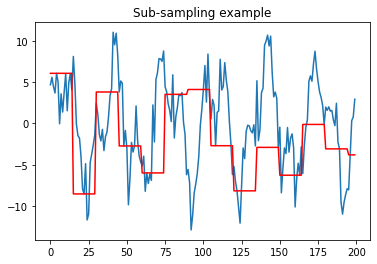

In [9]:
sub_sample = sub_sampling(arr_signal[0], h=15.5)
plt.plot(arr_signal[0])
plt.plot(sub_sample, c='r')
plt.title('Sub-sampling example')

## PAA (Piecewise Aggregate Approximation)

In [10]:
def PAA(signal, N): # N fixed-length segment
    N = int(N) # to be sure that N is an integer number
    len_sig = signal.shape[0]
    new_signal = np.copy(signal)
    n_points = len_sig // N # number of points in each segment
    for i in range(N):
        new_signal[i*n_points:(i+1)*n_points] = np.mean(signal[i*n_points:(i+1)*n_points])
    new_signal[N*n_points:len_sig] = np.mean(signal[N*n_points:len_sig])
    return new_signal

Text(0.5, 1.0, 'PAA example.')

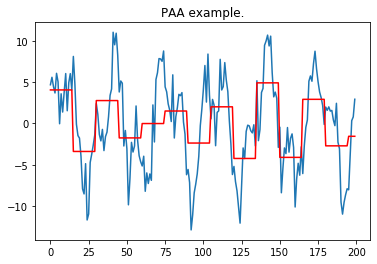

In [11]:
paa = PAA(arr_signal[0], N=13)
plt.plot(arr_signal[0])
plt.plot(paa, c='r')
plt.title('PAA example.')

In [20]:
# We can use below library
from tslearn.piecewise import PiecewiseAggregateApproximation as PAAp

Text(0.5, 1.0, 'PAA example.')

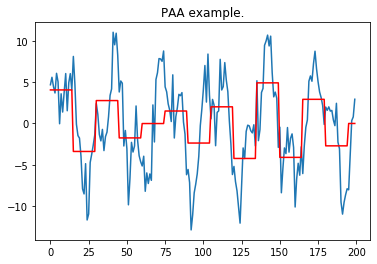

In [22]:
paa = PAAp(n_segments = 13)
paa_inv = paa.inverse_transform(paa.fit_transform(arr_signal))
plt.plot(arr_signal[0])
plt.plot(paa_inv[0], c='r')
plt.title('PAA example.')

In [17]:
paa_2

## PLA (Piecewise Linear Approximation)

In [25]:
from scipy import optimize
from scipy.interpolate import interp1d

In [123]:
# interpolation
def PLA(signal, n_segments):
    len_sig = signal.shape[0]
    x = np.arange(1, len_sig+1)
    y = signal
    f = interp1d(x, y)
    n_points = len_sig // n_segments
    xnew = np.arange(0, len_sig, n_points)
    xnew[0] = 1
    xnew = np.append(xnew, len_sig)
    return xnew, f(xnew)

Text(0.5, 1.0, 'PLA example.')

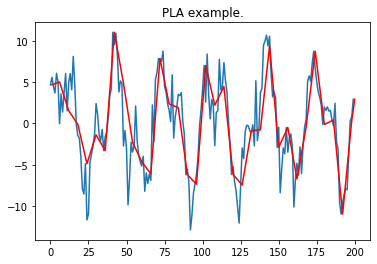

In [127]:
tnew, pla = PLA(arr_signal[0], n_segments=33)
plt.plot(arr_signal[0])
plt.plot(tnew, pla, c='r')
plt.title('PLA example.')

## SAX (Piecewise Aggregate Approximation)

In [14]:
from tslearn.piecewise import SymbolicAggregateApproximation as SAX

Text(0.5, 1.0, 'PAA example.')

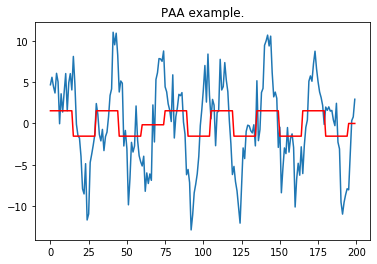

In [23]:
sax = SAX(n_segments=13, alphabet_size_avg=8)
sax_inv = sax.inverse_transform(sax.fit_transform(arr_signal))
plt.plot(arr_signal[0])
plt.plot(sax_inv[0], c='r')
plt.title('PAA example.')